## This is a tutorial for Pytorch.

### Tensors

In [79]:
# Make the necessary imports.
import torch, torchvision
import numpy as np
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [42]:
# Initialise the tensors.
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [43]:
# Also, tensors can be created from numpy arrays.
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [44]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n") # torch retains the data type unless explicitly overridden

x_rand = torch.rand_like(x_data, dtype=torch.float) # override data type
print(f"Random Tensor: \n {x_rand}\n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9277, 0.3609],
        [0.3162, 0.4271]])



In [45]:
# shape is a tuple of tensor dimensions
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.2926, 0.5881, 0.7217],
        [0.6453, 0.3782, 0.1487]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [46]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [47]:
# Move our tensor to GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [48]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [49]:
# concatenate tensors

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [50]:
# Multiply element-wise tensors
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor} \n")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [51]:
# Matrix multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")

# Alternative syntax
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [52]:
# In place operations: operations that have _ are in place.
# The use of in place operations is discouraged because they leed to a loss of history and derivatives can not be computed.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [53]:
# From tensor to numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [54]:
# Changes in tensors reflect changes in the numpy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [55]:
# NumPy array to tensor.
n = np.ones(5)
t = torch.from_numpy(n)

In [56]:
# Changes in numpy array are reflected on tensors.
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### torch.autograd

In [57]:
# Load a pretrained model.
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [58]:
# make a prediction.
prediction = model(data)

In [59]:
# Caculate the loss and start backpropagating by calculating the gradients.
loss = (prediction - labels).sum()
loss.backward()

In [60]:
# Set the optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [61]:
# Change the weights accordingly to the gradients following stochastic gradient descent with momentum.
optim.step()

In [62]:
# Details of autograd. For this reason we define two tensors that require gradients.
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create a new tensor that is a function of a,b.
$$ Q = 3*a^3 - b^2 $$

In [63]:
Q = 3*a**3 - b**2 # Assume that Q is the error function.

In [64]:
# When we call .backward() on Q, autograd calculates the derivatives of Q with respect to all its parameters - variables and stores them in .grad attribute. We can either aggregate Q into a scalar and call .backward implicitly (Q.sum().backward()) or explicitly pass to .backward an argument vector "gradient" of Q w.r.t. itself.

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [65]:
# Gradients are stored in .grad
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [66]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5), requires_grad=True)

a = x + y
print(f"Does 'a' require gradients? : {a.requires_grad}")
b = x + z
print(f"Does 'z' require gradients? : {z.requires_grad}")

Does 'a' require gradients? : False
Does 'z' require gradients? : True


In [67]:
model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [68]:
model.fc = nn.Linear(512, 10)
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

AttributeError: 'SGD' object has no attribute 'SGD'

### Neural Networks

In [70]:
# Define a N.N.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel 1
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [71]:
# Return the learnable parameters
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [72]:
# Feed NN with an input.
input = torch.randn(1, 1, 32, 32) # nSamples x nChannels x Height x Width
out = net(input)
print(out)

tensor([[-2.9260e-02,  2.8812e-02, -9.6706e-02,  7.5182e-02, -1.1304e-01,
         -1.6547e-01, -2.7384e-05, -1.9600e-03,  1.5708e-01, -2.0537e-02]],
       grad_fn=<AddmmBackward>)


In [73]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [74]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0131, grad_fn=<MseLossBackward>)


In [75]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [76]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0001,  0.0090, -0.0066,  0.0027, -0.0005,  0.0166])


In [78]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [80]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


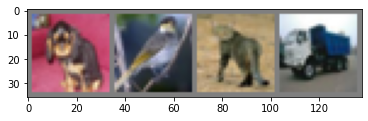

  dog  bird   cat truck


In [81]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [99]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [101]:
# For running on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device) 

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [102]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [103]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data # For running on cpu.
        inputs, labels = data[0].to(device), data[1].to(device) # For running on GPU.

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.195
[1,  4000] loss: 1.869
[1,  6000] loss: 1.692
[1,  8000] loss: 1.581
[1, 10000] loss: 1.523
[1, 12000] loss: 1.486
[2,  2000] loss: 1.433
[2,  4000] loss: 1.373
[2,  6000] loss: 1.362
[2,  8000] loss: 1.337
[2, 10000] loss: 1.306
[2, 12000] loss: 1.284
Finished Training


In [96]:
# save our model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

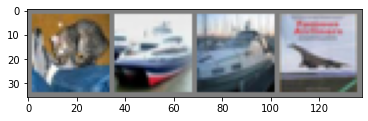

GroundTruth:    cat  ship  ship plane


In [97]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [87]:
# Reload model
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [88]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [89]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [90]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 47 %
Accuracy of   car : 74 %
Accuracy of  bird : 45 %
Accuracy of   cat : 47 %
Accuracy of  deer : 37 %
Accuracy of   dog : 26 %
Accuracy of  frog : 68 %
Accuracy of horse : 68 %
Accuracy of  ship : 68 %
Accuracy of truck : 54 %


In [91]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [92]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)